In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [10]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['class'] = iris.target

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df['class'].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [14]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['class'], random_state=40)

In [15]:
train_df['class'].value_counts()

class
0    40
1    40
2    40
Name: count, dtype: int64

In [16]:
test_df['class'].value_counts()

class
1    10
2    10
0    10
Name: count, dtype: int64

In [22]:
train_df.to_csv('Data/iris_train.csv', index=False, header=False)
test_df.to_csv('Data/iris_test.csv', index=False, header=False)

In [23]:
infer_df = test_df.drop(columns=['class'])

In [24]:
infer_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
84,5.4,3.0,4.5,1.5
142,5.8,2.7,5.1,1.9
116,6.5,3.0,5.5,1.8
104,6.5,3.0,5.8,2.2
119,6.0,2.2,5.0,1.5


In [25]:
infer_df.to_csv('Data/iris_infer.csv', index=False, header=False)

In [26]:
!head Data/iris_train.csv

4.4,3.2,1.3,0.2,0
5.2,3.4,1.4,0.2,0
6.8,2.8,4.8,1.4,1
5.0,3.2,1.2,0.2,0
5.6,2.8,4.9,2.0,2
5.8,2.7,3.9,1.2,1
5.1,3.7,1.5,0.4,0
4.4,3.0,1.3,0.2,0
4.9,3.1,1.5,0.1,0
5.0,3.0,1.6,0.2,0


In [33]:
!aws s3 cp Data/iris_train.csv s3://sagemakerlearningwithiris/iris/data/
!aws s3 cp Data/iris_test.csv s3://sagemakerlearningwithiris/iris/data/
!aws s3 cp Data/iris_infer.csv s3://sagemakerlearningwithiris/iris/batch_transform/

upload: Data/iris_train.csv to s3://sagemakerlearningwithiris/iris/data/iris_train.csv
upload: Data/iris_test.csv to s3://sagemakerlearningwithiris/iris/data/iris_test.csv
upload: Data/iris_infer.csv to s3://sagemakerlearningwithiris/iris/batch_transform/iris_infer.csv


In [31]:
!aws s3 mb s3://sagemakerlearningwithiris

make_bucket: sagemakerlearningwithiris


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [35]:
plt.style.use('fivethirtyeight')

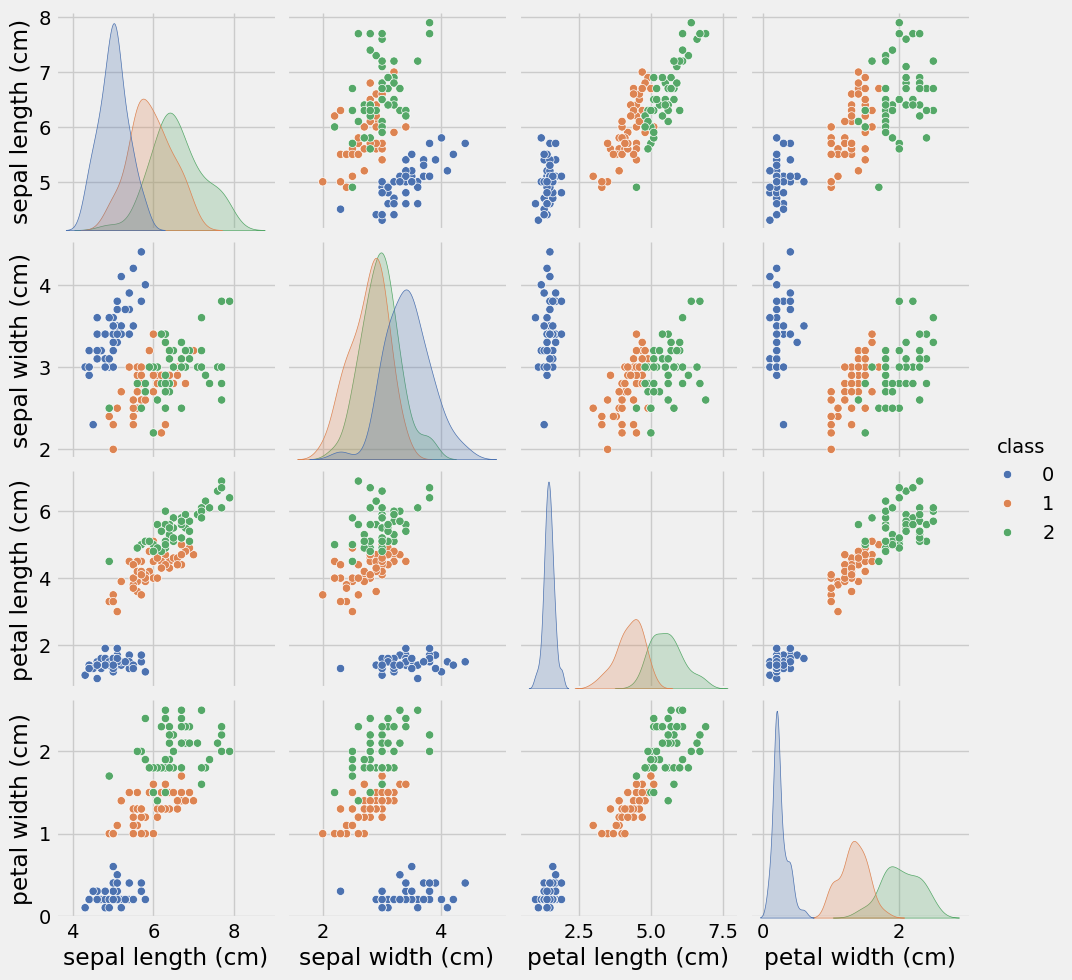

In [36]:
sns.pairplot(df, hue='class', palette='deep')